In [1]:
# import data
data <- read.csv('/Users/alessia/Desktop/economic_freedom/freedom_index.csv')
# only select numeric variables
num.data <- data[c(5:17)]

We perform outliers detection through a robust method (Minimum Covariance Determinant), in order for outliers not to influence the method. In the minimum covariance determinant method, at alpha = 0.5, the method is more robust. However, when there aren't many outliers, alpha = 0.75 is preferrable.

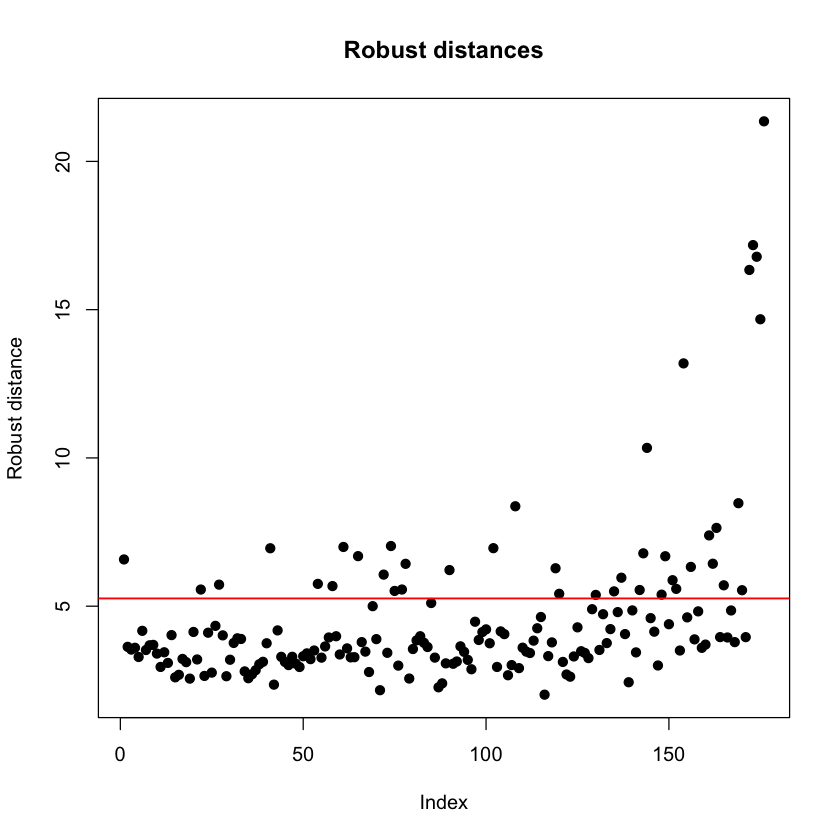

In [2]:
# detect outliers through minimumum covariance determinant (MCD)

# robust distances through minimum covariance determinant
# alpha = 0.5
library(robustbase)
fmcd <- covMcd(num.data, alpha = 0.5, cor = TRUE)
rd <- sqrt(fmcd$mah)
plot(1:nrow(num.data), rd, pch = 19, xlab = 'Index', ylab = 'Robust distance', main = 'Robust distances')
cutoff <- sqrt(qchisq(0.99, ncol(num.data)))
abline(h= cutoff, lwd = 1.5, col = 'red')

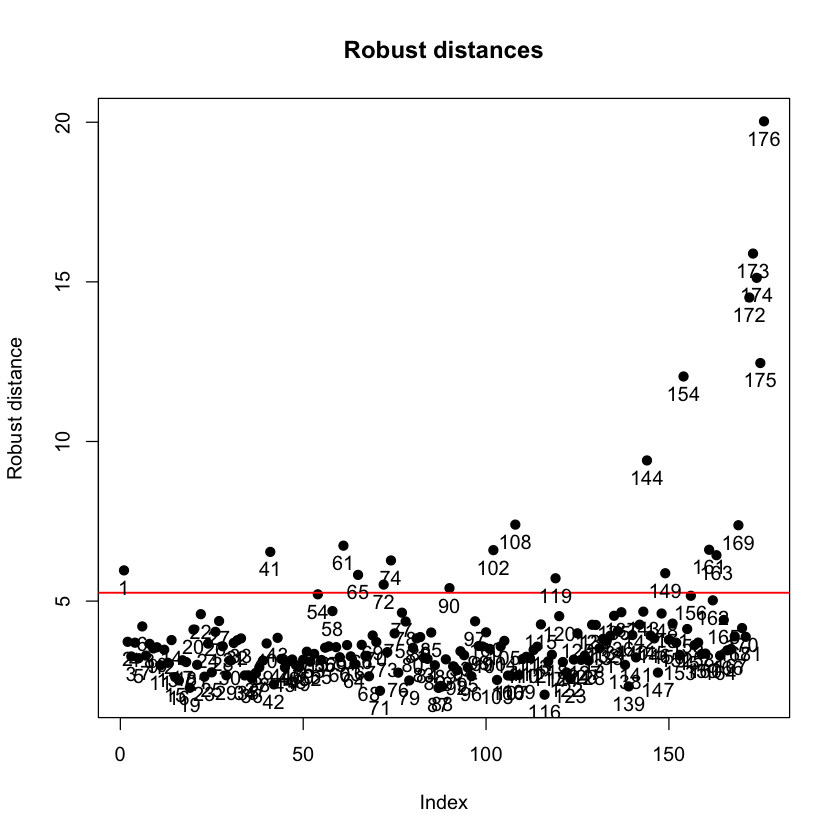

In [3]:
# robust distances through minimum covariance determinant
# alpha = 0.75
library(robustbase)
fmcd <- covMcd(num.data, alpha = 0.75, cor = TRUE)
rd <- sqrt(fmcd$mah)
plot(1:nrow(num.data), rd, pch = 19, xlab = 'Index', ylab = 'Robust distance', main = 'Robust distances')
cutoff <- sqrt(qchisq(0.99, ncol(num.data)))
abline(h= cutoff, lwd = 1.5, col = 'red')
text(1:nrow(num.data), rd, labels = 1:length(rd), pos = 1, offset = 0.5)

In this case, alpha = 0.75 is preferrable, as it flags less mild observations as outliers.
We can now compare the robust fit to a classical method (Mahalanobis distance) through a distance-distance plot.

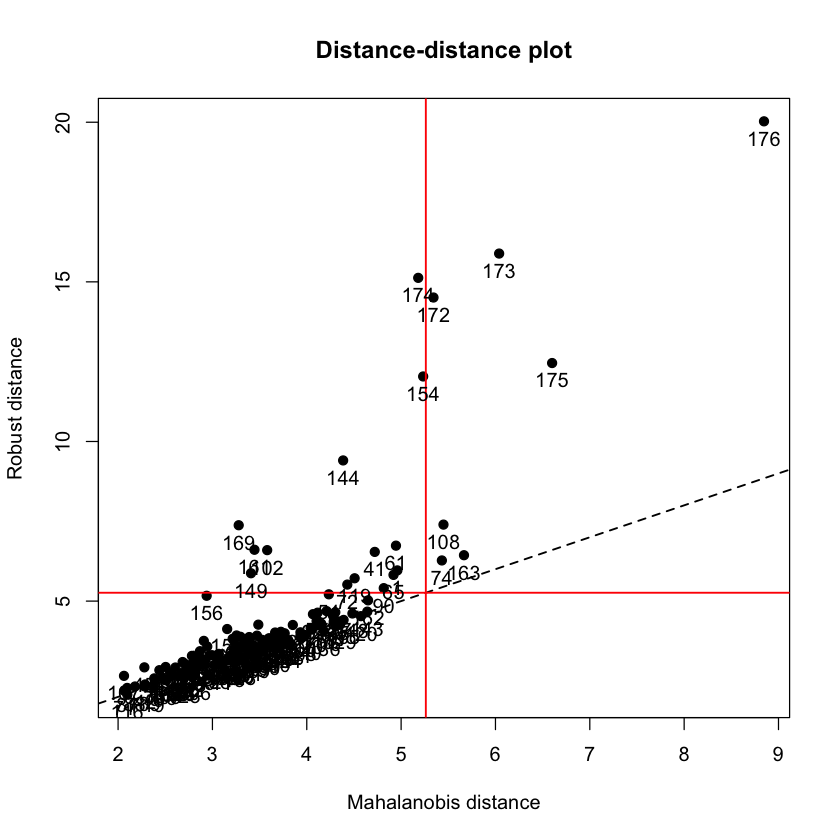

In [4]:
# differences between the robust and classical fit through a distance-distance plot
ccenter <- colMeans(num.data)
ccov <- cov(num.data)
md <- sqrt(mahalanobis(num.data, center = ccenter, cov = ccov))
plot(md, rd, pch = 19, xlab = 'Mahalanobis distance', ylab = 'Robust distance', main = 'Distance-distance plot')
abline(c(0,1), lwd = 1.5, lty = 2)
abline(h = cutoff, lwd = 1.5, col = 'red')
abline(v = cutoff, lwd = 1.5, col = 'red')
text(md, rd, labels = 1:length(md), pos = 1, offset = 0.5)
# quite a number of observations (as previously seen with robust distances) clearly stands out

As expected, the robust method uncovers more outliers than the classical method.

In [5]:
# observations flagged as outliers are removed
outl <- which(fmcd$mah > cutoff^2)
cat("Number of outliers:", length(outl), "\n")
# explore observations flagged as outliers
data[c(outl),]
data.prep <- data[-c(176, 173, 175, 172, 174, 154, 144, 169, 108),] # remove outliers

Number of outliers: 21 


,X,Country,Region,Year,Overall.Score,Property.Rights,Government.Integrity,Judicial.Effectiveness,Tax.Burden,Government.Spending,Fiscal.Health,Business.Freedom,Labor.Freedom,Monetary.Freedom,Trade.Freedom,Investment.Freedom,Financial.Freedom
,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Singapore,Asia-Pacific,2024,83.5,94.2,88.3,58.3,90.7,89.2,76.0,86.9,77.3,76.3,95.0,90,80
41,40,Barbados,Americas,2024,66.8,72.3,68.3,87.3,81.4,66.3,55.7,73.3,56.2,77.7,43.6,60,60
61,60,The Bahamas,Americas,2024,62.5,60.9,65.5,78.4,96.5,76.1,4.2,67.2,70.2,71.7,49.6,50,60
65,64,Vanuatu,Asia-Pacific,2024,62.2,63.3,47.9,71.0,98.8,45.0,90.4,55.1,40.1,69.9,59.6,65,40
72,71,Belize,Americas,2024,61.2,34.1,41.4,71.5,82.0,78.5,64.7,67.2,64.1,70.9,55.2,55,50
74,73,Micronesia,Asia-Pacific,2024,61.0,64.7,56.9,84.3,84.2,0.0,99.6,53.0,72.5,77.6,74.8,35,30
90,89,Kuwait,Middle East/North Africa,2024,58.5,42.1,41.9,41.4,97.7,11.3,100.0,56.2,53.0,67.9,75.6,55,60
102,101,Türkiye,Europe,2024,56.2,40.6,35.0,24.4,72.5,71.0,77.5,59.2,54.6,38.5,70.8,70,60
108,107,Bhutan,Asia-Pacific,2024,55.4,67.3,71.0,64.2,83.6,61.8,36.5,67.0,56.7,69.2,37.6,20,30


By examining outliers, we see that they mainly correspond to countries in a peculiar economic or political situation: the most extreme outlier is represented by North Korea, which has a 0.0 score on many indicators. Sudan and Cuba, which are in an unstable political situation, also represent very pronounced outliers. Overall, countries with an unusually high or unusually low score on at least one indicator represent outliers. Since their presence could mislead the following analyses, the most extreme ones have to be removed.
Since some outliers (such as Singapore) are very mild, we decided to keep this kind of instances.

In [6]:
data.prep

,X,Country,Region,Year,Overall.Score,Property.Rights,Government.Integrity,Judicial.Effectiveness,Tax.Burden,Government.Spending,Fiscal.Health,Business.Freedom,Labor.Freedom,Monetary.Freedom,Trade.Freedom,Investment.Freedom,Financial.Freedom
,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Singapore,Asia-Pacific,2024,83.5,94.2,88.3,58.3,90.7,89.2,76.0,86.9,77.3,76.3,95.0,90,80
2,1,Switzerland,Europe,2024,83.0,94.2,91.3,98.1,70.4,64.6,95.7,89.3,60.7,80.8,86.4,85,80
3,2,Ireland,Europe,2024,82.6,93.5,83.4,94.3,78.0,82.4,91.7,91.3,62.8,74.5,79.2,90,70
4,3,Taiwan,Asia-Pacific,2024,80.0,82.2,73.4,94.0,79.2,90.5,90.3,84.9,69.1,80.1,86.4,70,60
5,4,Luxembourg,Europe,2024,79.2,96.9,84.9,95.8,64.6,40.6,97.6,89.5,57.7,69.1,79.2,95,80
6,5,Denmark,Europe,2024,77.8,98.6,97.4,89.6,41.8,26.8,98.2,92.7,64.9,74.3,79.2,90,80
7,6,Estonia,Europe,2024,77.8,92.8,81.2,93.4,80.8,46.8,85.4,83.2,64.2,66.2,79.2,90,70
8,7,New Zealand,Asia-Pacific,2024,77.8,87.4,95.9,93.2,65.5,46.3,72.4,88.3,70.3,74.6,89.8,70,80
9,8,Norway,Europe,2024,77.5,98.8,95.6,96.7,61.7,32.1,97.2,87.2,69.4,71.1,84.8,75,60


In [9]:
nrow(data.prep) # check length of dataset without outliers

[1] 167

In [10]:
# save dataframe
file_path <- "/Users/alessia/Desktop/economic_freedom/data.prep.csv"
write.csv(data.prep, file = file_path, row.names = TRUE)

We now transform the variables to a more normal distribution through Box-Cox transformations.

lambda Overall.Score is: 1.59596 
p-value of Overall.Score is: 0.1287758 
[1] "Cannot reject normality assumption"
lambda Property.Rights is: 0.5858586 


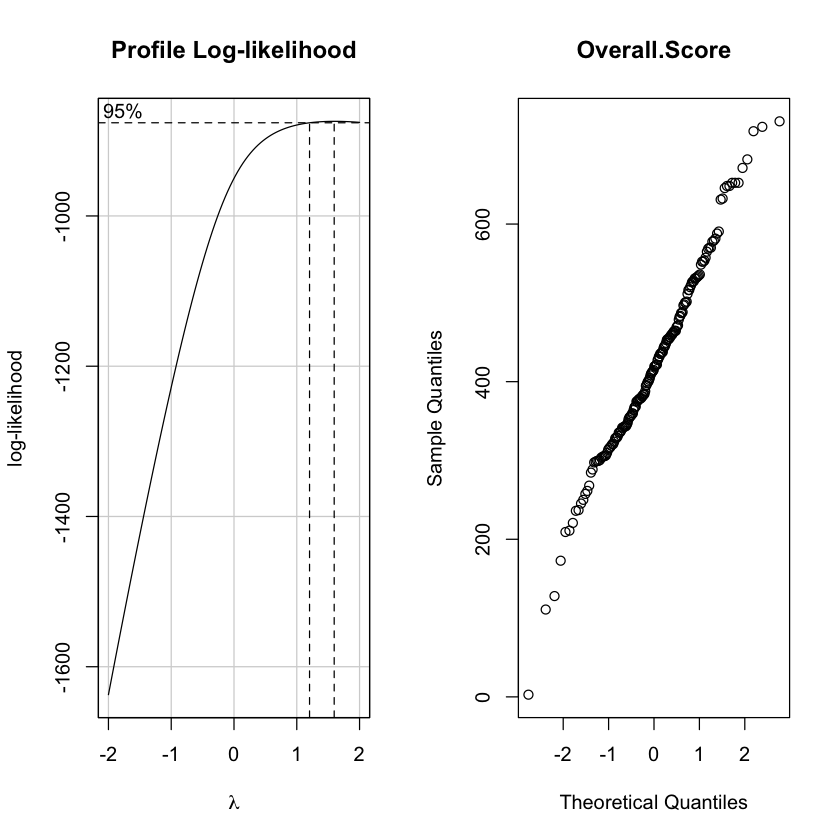

p-value of Property.Rights is: 0.001459955 
lambda Government.Integrity is: 0.5050505 


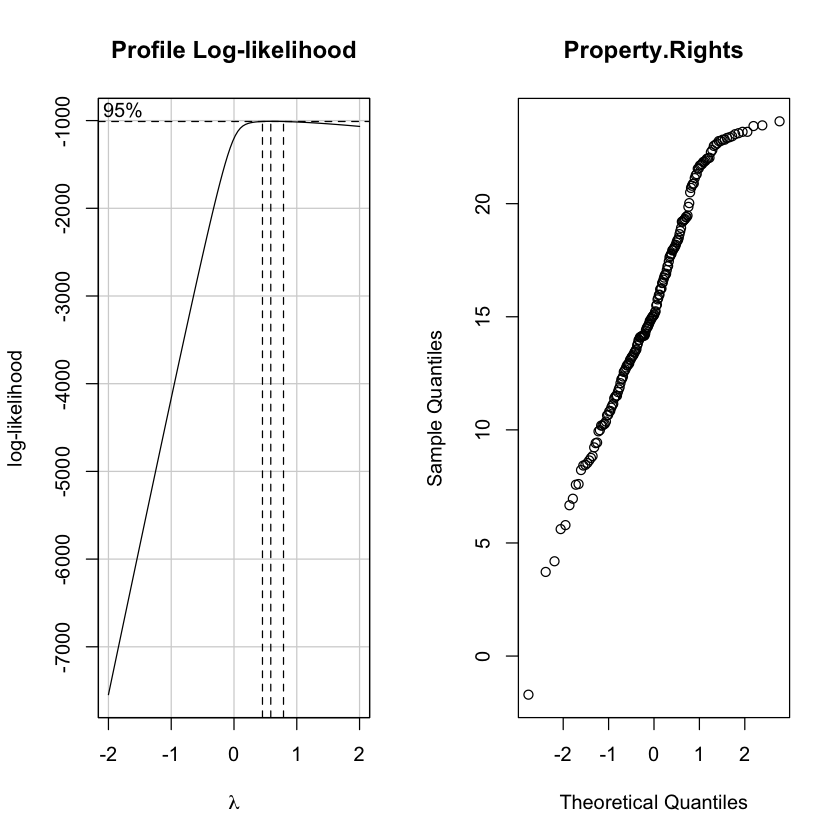

p-value of Government.Integrity is: 0.2522495 
[1] "Cannot reject normality assumption"
lambda Judicial.Effectiveness is: 0.6262626 


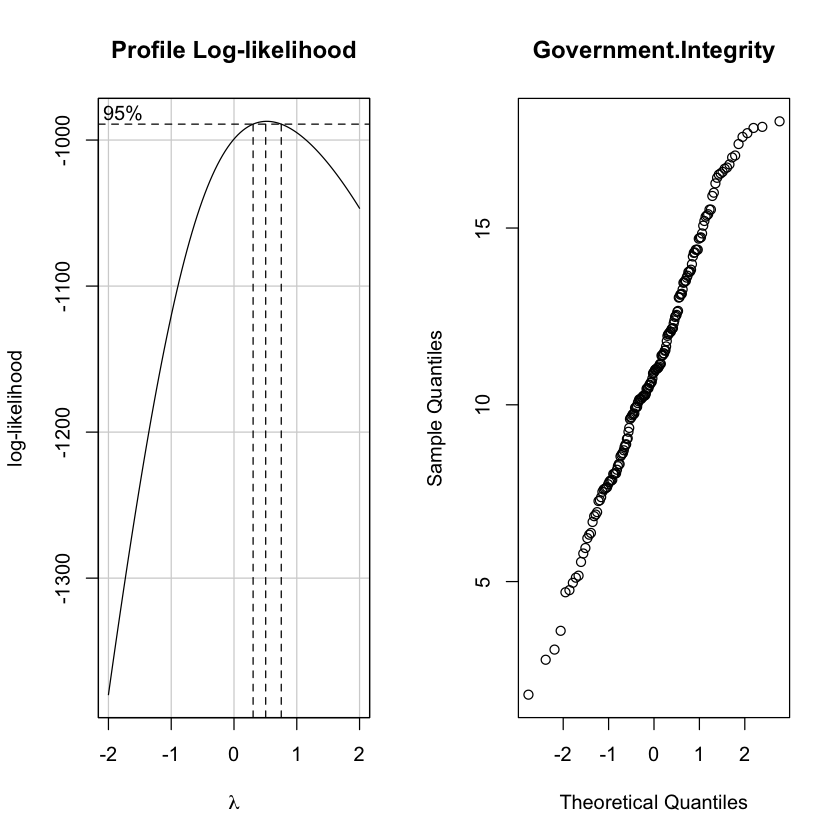

p-value of Judicial.Effectiveness is: 0.0003335546 
lambda Tax.Burden is: 1.353535 


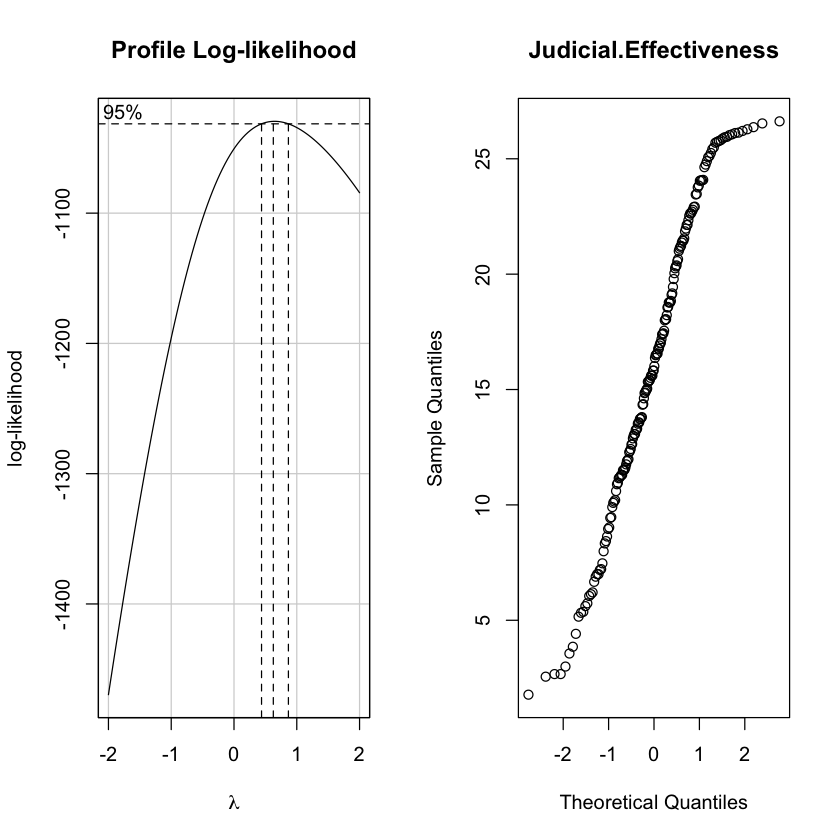

p-value of Tax.Burden is: 7.375205e-05 
lambda Government.Spending is: 0.6666667 


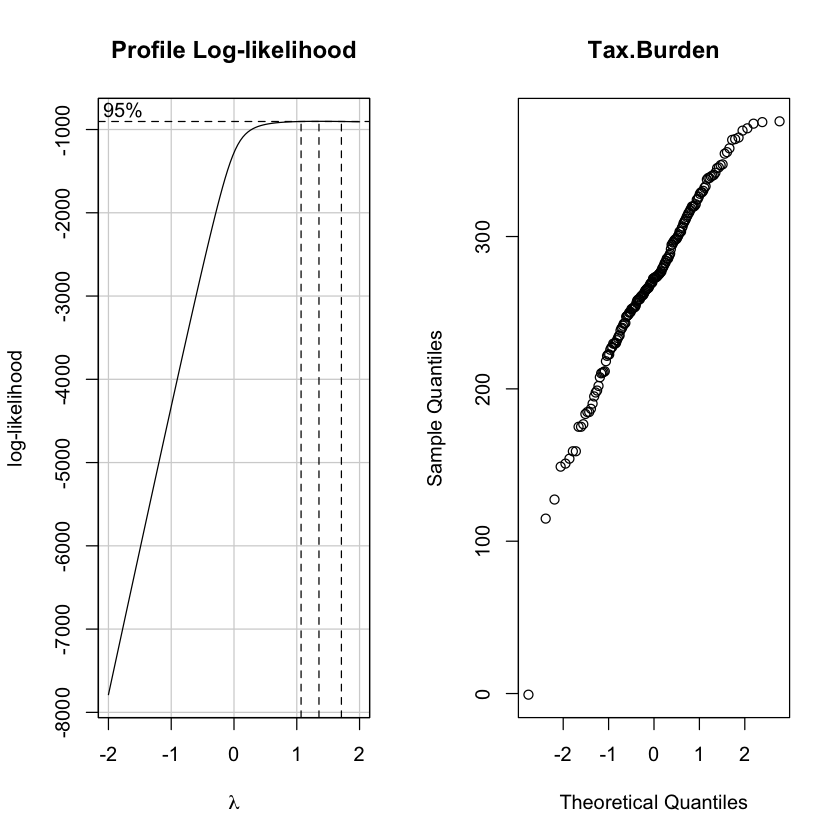

p-value of Government.Spending is: 9.8071e-13 
lambda Fiscal.Health is: 0.3838384 


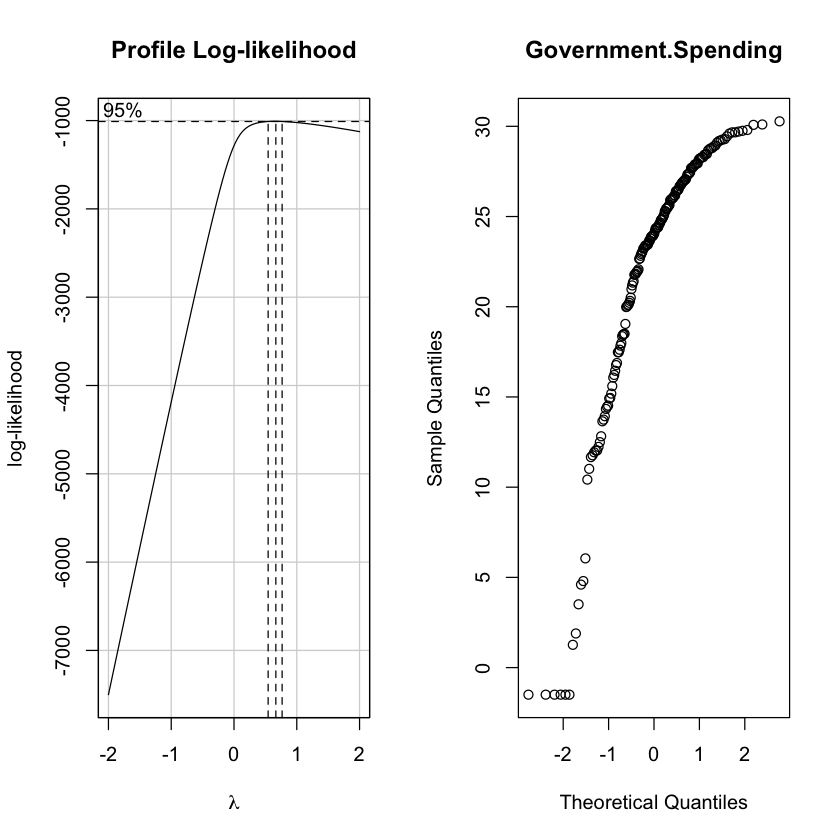

p-value of Fiscal.Health is: 9.782726e-12 
lambda Business.Freedom is: 1.474747 


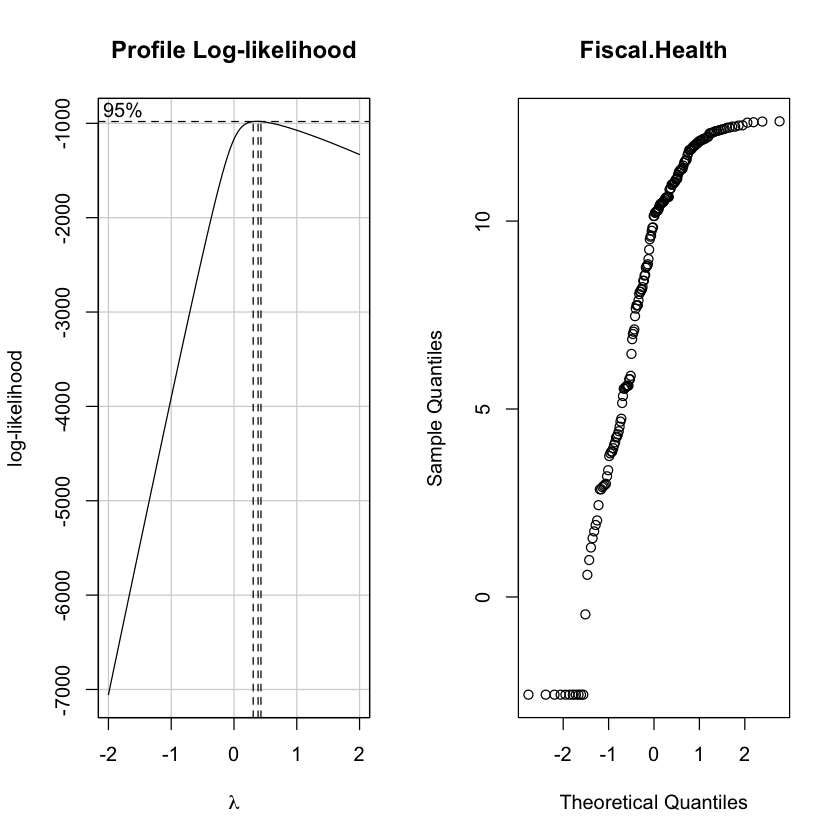

p-value of Business.Freedom is: 0.007447349 
lambda Labor.Freedom is: 1.959596 


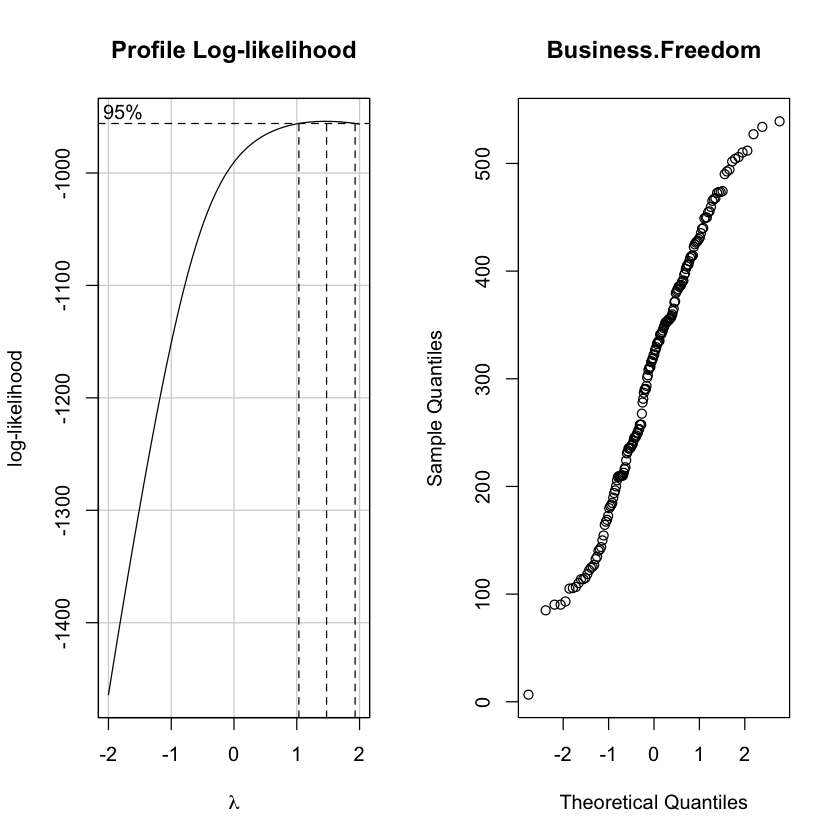

p-value of Labor.Freedom is: 0.5631509 
[1] "Cannot reject normality assumption"
lambda Monetary.Freedom is: 1.272727 


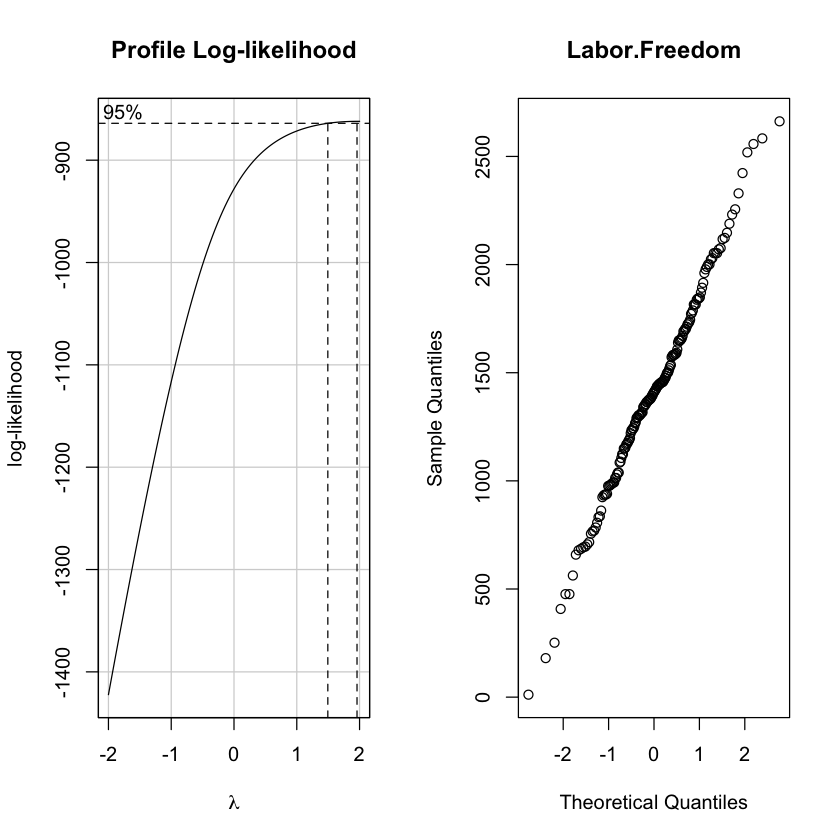

p-value of Monetary.Freedom is: 5.417383e-18 
lambda Trade.Freedom is: 1.393939 


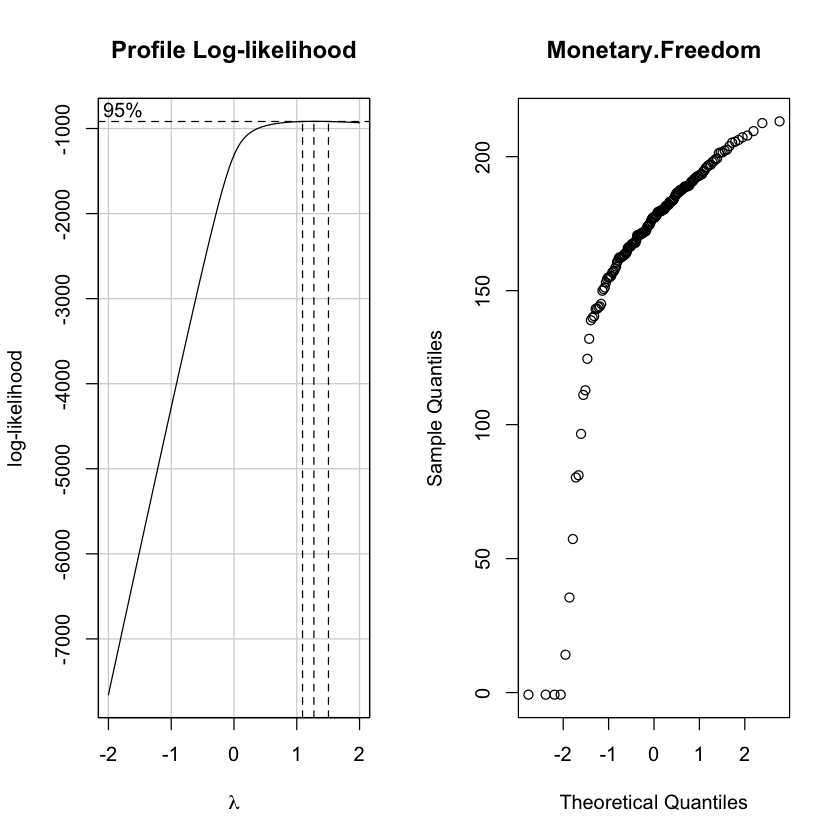

p-value of Trade.Freedom is: 1.622198e-05 
lambda Investment.Freedom is: 0.7878788 


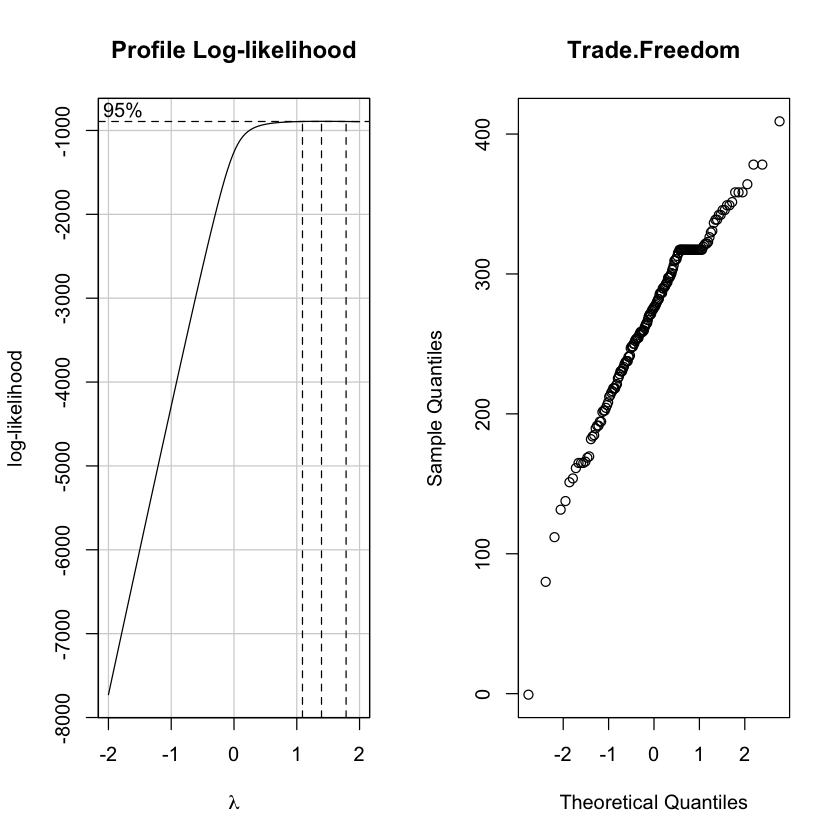

p-value of Investment.Freedom is: 4.685124e-08 
lambda Financial.Freedom is: 0.7474747 


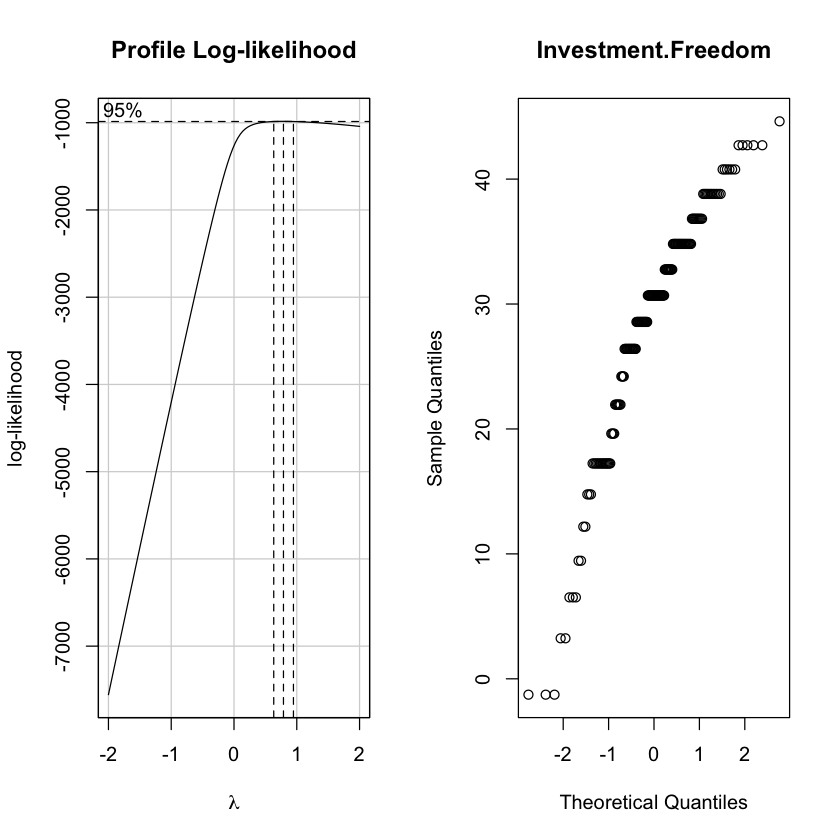

p-value of Financial.Freedom is: 6.411524e-05 


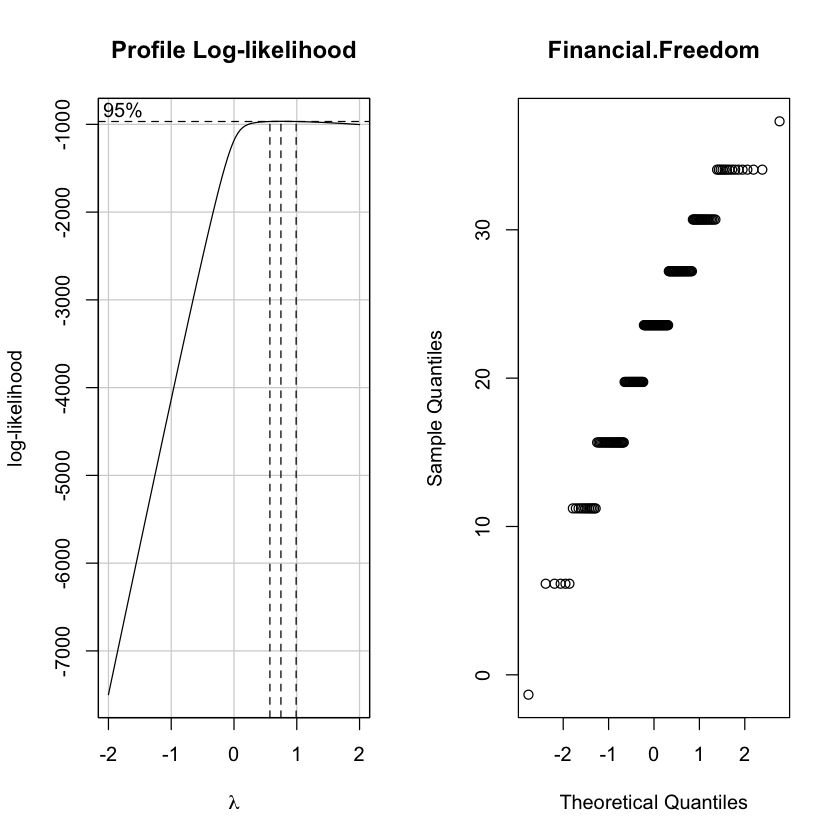

In [58]:
# create dataframe with transformed variables
new.data <- data.frame(data$Country, data$Region)

# transform variables through Box-Cox
library(car)

par(mfrow = c(1, 2))
i <- 5
for (var in colnames(data.prep)[5:17]){
if (min(data[[var]]) <= 0){
    data[[var]] <- data[[var]] + 0.0000001
}
bc <- boxCox(data[[var]] ~ 1) # also gives the log-likelihood plot  
    
lambdah <- bc$x[which.max(bc$y)]
cat("lambda", var, 'is:', lambdah, "\n")
    
# transform 
trans <- bcPower(data[[var]], lambdah)
qqnorm(trans, main = var)
    
x <- shapiro.test(trans)$p.value
    
cat("p-value of", var, 'is:', x, "\n")
    
if (x > 0.05){
  print('Cannot reject normality assumption')
}

new.data <- data.frame(new.data, trans) 
} 

In [62]:
new.data

data.Country,data.Region,trans,trans.1,trans.2,trans.3,trans.4,trans.5,trans.6,trans.7,trans.8,trans.9,trans.10,trans.11,trans.12
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Singapore,Asia-Pacific,730.3645,22.76806,17.05153,18.77438,329.0387,28.445702,11.128199,490.0567,2557.500,194.7405,409.0930,42.70992,34.05498
Switzerland,Europe,723.3912,22.76806,17.37539,26.62286,233.2986,22.649767,12.398550,510.1745,1592.295,209.5336,358.3194,40.77330,34.05498
Ireland,Europe,717.8305,22.66134,16.51060,25.93324,268.1343,26.903775,12.154666,527.1368,1702.071,188.8888,317.3096,42.70992,30.69295
Taiwan,Asia-Pacific,682.0780,20.89013,15.35548,25.87835,273.7484,28.735952,12.067761,473.4919,2052.860,207.2173,358.3194,34.80974,27.20694
Luxembourg,Europe,671.2148,23.17664,16.67782,26.20667,207.5875,16.219112,12.512196,511.8627,1441.693,171.5672,317.3096,44.62383,34.05498
Denmark,Europe,652.3613,23.43147,18.01806,25.06574,114.8324,11.933251,12.547801,539.1161,1815.427,188.2410,317.3096,42.70992,34.05498
Estonia,Europe,652.3613,22.55429,16.26263,25.76839,281.2807,17.979979,11.756880,459.5566,1777.244,162.4143,317.3096,42.70992,30.69295
New Zealand,Asia-Pacific,652.3613,21.71696,17.86192,25.73168,211.5256,17.840985,10.874760,501.7605,2123.319,189.2129,378.1655,34.80974,34.05498
Norway,Europe,648.3474,23.46133,17.83055,26.36997,195.0305,13.650534,12.488384,492.5572,2070.365,177.9411,349.0852,36.82521,27.20694


In [63]:
# rename transformed variables
library(tidyverse)
data.trans <- new.data %>%
  rename(Country = data.Country,
         Region = data.Region,
         Overall.Score = trans,
         Property.Rights = trans.1,
         Government.Integrity = trans.2,
         Judicial.Effectiveness = trans.3,
         Tax.Burden = trans.4,
         Government.Spending = trans.5,
         Fiscal.Health = trans.6,
         Business.Freedom = trans.7,
         Labor.Freedom = trans.8,
         Monetary.Freedom = trans.9,
         Trade.Freedom = trans.10,
         Investment.Freedom = trans.11,
         Financial.Freedom = trans.12)

In [65]:
# save dataframe
file_path <- "/Users/alessia/Desktop/economic_freedom/data.transformed.csv"
write.csv(data.trans, file = file_path, row.names = TRUE)